# &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Marvel Character Analysis

### The project is part of Data Science hackathon which was conducted by Tata Consultancy Services. The complete challenge was divided in three segments: <br><br> 1) Web Scrapping - Scrap the data of marvel character from [here](http://marvel-hulk.surge.sh) <br> 2) Data Cleaning - Clean the scrapped data <br> 3) Data Analysis - Answer few question based on the dataset

In [1]:
# importing necessary libraries
import requests   #to get html from web page
from bs4 import BeautifulSoup   #to parse the html
import pandas as pd   #to work with dataframe
import matplotlib.pyplot as plt


In [2]:
# modify the ast_note_interactivity kernel option so we can see the value of multiple statements at once.
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Web Scrapping

In [3]:
# reading html of the page for python using 'request' library
r = requests.get('http://marvel-hulk.surge.sh')

# parsing the html using 'BeautifulSoup' library and 'html' parser
soup = BeautifulSoup(r.text, 'html.parser')

In [4]:
# the 'find_all' function will find all the 'div' tag with having 'class' attribute
# of the form "<div class="col-lg-8 mx-auto">"
results = soup.find_all('div', {'class':'col-lg-8 mx-auto'})
results[0:5]

[<div class="col-lg-8 mx-auto">
 <h2>alicia masters (heroes reborn) (earth-616)</h2>
 <br/>
 <h4>Identity : <a href="http://127.0.0.1:5000/#">None</a></h4>
 <h4>Align : <a href="http://127.0.0.1:5000/#">good characters</a></h4>
 <h4>Eye : <a href="http://127.0.0.1:5000/#">None</a></h4>
 <h4>Hair : <a href="http://127.0.0.1:5000/#">red hair</a></h4>
 <h4>Sex : <a href="http://127.0.0.1:5000/#">female characters</a></h4>
 <h4>Alive : <a href="http://127.0.0.1:5000/#">living characters</a></h4>
 <h4>Appearances : <a href="http://127.0.0.1:5000/#">5.0</a></h4>
 <h4>First Appearance : <a href="http://127.0.0.1:5000/#">jan-97</a></h4>
 <h4>Year : <a href="http://127.0.0.1:5000/#">1997.0</a></h4>
 </div>, <div class="col-lg-8 mx-auto">
 <p class="h2">amy reilly (earth-616)</p>
 <br/>
 <p class="h4">Identity : <a href="http://127.0.0.1:5000/#">no dual identity</a></p>
 <p class="h4">Align : <a href="http://127.0.0.1:5000/#">good characters</a></p>
 <p class="h4">Eye : <a href="http://127.0.0.1

In [5]:
records = []
for result in results:
    temp = result.text.split('\n')
    temp = list(filter(None,temp)) #removes any empty string from list
    new_list = []
    for i in temp:
        if ':' in i:
            new_list.append(i.split(':')[1].strip())
        else:
            new_list.append(i)
    records.append(new_list)
    
records[0:5]

[['alicia masters (heroes reborn) (earth-616)',
  'None',
  'good characters',
  'None',
  'red hair',
  'female characters',
  'living characters',
  '5.0',
  'jan-97',
  '1997.0'],
 ['amy reilly (earth-616)',
  'no dual identity',
  'good characters',
  'None',
  'black hair',
  'female characters',
  'living characters',
  '7.0',
  'sep-09',
  '2009.0'],
 ['porky (earth-616)',
  'None',
  'None',
  'None',
  'brown hair',
  'male characters',
  'living characters',
  '2.0',
  'apr-64',
  '1964.0'],
 ['pyron (earth-616)',
  'secret identity',
  'bad characters',
  'None',
  'None',
  'male characters',
  'living characters',
  '1.0',
  'apr-81',
  '1981.0'],
 ['gardner monroe (earth-616)',
  'secret identity',
  'bad characters',
  'grey eyes',
  'black hair',
  'male characters',
  'living characters',
  '18.0',
  'aug-83',
  '1983.0']]

In [6]:
# declaring column name to be used in dataframe
column_name = ['name','id','align','eye','hair','sex','alive','appearances','first appearance','year']

# below two lines will create a dataframe 'df' and store in csv file 'Mfdm_superhero.csv'
df = pd.DataFrame(records, columns=column_name)
df.to_csv('/Users/alok/Python/DataScience/Data_Files/Mfdm_superhero.csv',index=False, encoding='utf-8')

# printing first and last five records of dataframe
df.head()
df.tail()

,name,id,align,eye,hair,sex,alive,appearances,first appearance,year
0,alicia masters (heroes reborn) (earth-616),None,good characters,None,red hair,female characters,living characters,5.0,jan-97,1997.0
1,amy reilly (earth-616),no dual identity,good characters,None,black hair,female characters,living characters,7.0,sep-09,2009.0
2,porky (earth-616),None,None,None,brown hair,male characters,living characters,2.0,apr-64,1964.0
3,pyron (earth-616),secret identity,bad characters,None,None,male characters,living characters,1.0,apr-81,1981.0
4,gardner monroe (earth-616),secret identity,bad characters,grey eyes,black hair,male characters,living characters,18.0,aug-83,1983.0


,name,id,align,eye,hair,sex,alive,appearances,first appearance,year
1995,astrella carpenter (earth-616),None,None,None,blond hair,female characters,living characters,8.0,aug-72,1972.0
1996,clayton wojciehowicz (earth-616),public identity,bad characters,black eyes,bald,male characters,deceased characters,3.0,may-08,2008.0
1997,benny elton (earth-616),no dual identity,neutral characters,None,brown hair,male characters,living characters,1.0,may-47,1947.0
1998,basilisk (demon) (earth-616),None,bad characters,red eyes,None,male characters,living characters,4.0,jun-76,1976.0
1999,omega white (earth-616),secret identity,bad characters,white eyes,no hair,male characters,living characters,6.0,jul-12,2012.0


## &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Data Cleaning

In [7]:
# taking month out and capitalizing it from 'first appearance' column
df['first appearance'] = df['first appearance'].apply(lambda x : x.split('-')[0]).str.capitalize()+' 01, '

# taking only the year value from 'year' column
df['year'] = df['year'].apply(lambda x : x.split('.')[0])

# creating new column 'timeline' and filling all 'None' value in df with 'not-available'
df['timeline'] = df['first appearance'] + df['year']
df['timeline'] = pd.to_datetime(df['timeline'],errors='coerce')
df = df.replace({'None':'not-available'})
df = df.drop(['first appearance','year'],axis=1)
df = df.fillna('not-available')

# exporting df to a csv file
df.to_csv('/Users/alok/Python/DataScience/Data_Files/Mfdm_superhero_cleaned.csv',index=False, encoding='utf-8')

In [8]:
cleaned_df = pd.read_csv('/Users/alok/Python/DataScience/Data_Files/Mfdm_superhero_cleaned.csv')

In [9]:
# creating a csv which contains name of all characters who appeared between 1975 and 2015
name = cleaned_df[((cleaned_df['timeline']>'1975-01-01') & (cleaned_df['timeline']<'2015-08-01'))]['name'].sort_values()
name.to_csv('/Users/alok/Python/DataScience/Data_Files/Mfdm_superhero_name.csv',index=False, encoding='utf-8')

/Users/alok/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  This is separate from the ipykernel package so we can avoid doing imports until


In [10]:
cleaned_df.head()
cleaned_df.tail()

,name,id,align,eye,hair,sex,alive,appearances,timeline
0,alicia masters (heroes reborn) (earth-616),not-available,good characters,not-available,red hair,female characters,living characters,5.0,1997-01-01 00:00:00
1,amy reilly (earth-616),no dual identity,good characters,not-available,black hair,female characters,living characters,7.0,2009-09-01 00:00:00
2,porky (earth-616),not-available,not-available,not-available,brown hair,male characters,living characters,2.0,1964-04-01 00:00:00
3,pyron (earth-616),secret identity,bad characters,not-available,not-available,male characters,living characters,1.0,1981-04-01 00:00:00
4,gardner monroe (earth-616),secret identity,bad characters,grey eyes,black hair,male characters,living characters,18.0,1983-08-01 00:00:00


,name,id,align,eye,hair,sex,alive,appearances,timeline
1995,astrella carpenter (earth-616),not-available,not-available,not-available,blond hair,female characters,living characters,8.0,1972-08-01 00:00:00
1996,clayton wojciehowicz (earth-616),public identity,bad characters,black eyes,bald,male characters,deceased characters,3.0,2008-05-01 00:00:00
1997,benny elton (earth-616),no dual identity,neutral characters,not-available,brown hair,male characters,living characters,1.0,1947-05-01 00:00:00
1998,basilisk (demon) (earth-616),not-available,bad characters,red eyes,not-available,male characters,living characters,4.0,1976-06-01 00:00:00
1999,omega white (earth-616),secret identity,bad characters,white eyes,no hair,male characters,living characters,6.0,2012-07-01 00:00:00


## &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Data Analysis

### Question 1
Golden Age of Comic books was
a time when comic books rapidly
increased in popularity. The
concept of superheroes were
created and many well known
characters were introduced. How
many comic characters in your
dataset made their first
appearance during the Golden Age ?

In [11]:
cleaned_df[((cleaned_df['timeline']>='1938-01-01') & (cleaned_df['timeline']<'1957-01-01'))].shape[0]

265

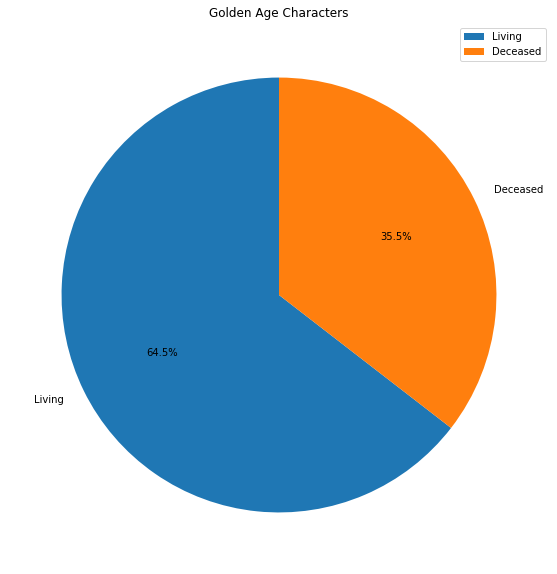

In [12]:
golden_year = cleaned_df[((cleaned_df['timeline']>='1938-01-01') & (cleaned_df['timeline']<'1957-01-01'))]
plt.figure(figsize=(10,10))
plt.pie(golden_year['alive'].value_counts(),labels=['Living','Deceased'], autopct='%1.1f%%',startangle=90)
plt.legend()
plt.title('Golden Age Characters');

### Question 2
Silver Age of Comic books saw
advancements in artistic ability. The
Silver Age characters were Flawed
and Self Doubting. Under the aegis
of Stan-Lee Marvel et al, started
gaining prominence. This age was
also inspired by Science Fiction and
explained the super hero
phenomenon through science. How
many public identity characters
made their first appearance during
this age from this dataset ?

In [13]:
cleaned_df[((cleaned_df['timeline']>='1956-01-01') & (cleaned_df['timeline']<'1971-01-01'))]['id'].str.contains('public identity').sum()

63

### Question 3
Blue-eyed boy is someone who
is very well liked and treated .
How many blue-eyed boys did
marvel create , get them from
your data ?

In [14]:
((cleaned_df['eye']=='blue eyes') & (cleaned_df['sex']=='male characters')).sum()

176

### Question 4
In the super hero mythology ,
there are super heroes and their
alter-egos. Spider Man is Peter
Parker . Some of them have
public identity whereas some still
maintain their secret identity .
How many of the good living
characters in this dataset can you
identify that are still maintaining
their secret identity ?

In [15]:
((cleaned_df['id']=='secret identity') & (cleaned_df['align']=='good characters') & (cleaned_df['alive']=='living characters')).sum()

155

### Question 5
In the movie Unbreakable , Elijah
Price is born with a disease where
his bones are extremely fragile and
prone to fracture. He grows up
becoming a comic-book art dealer
and develops a theory based on
comics that if he represents
someone who is extremely fragile ,
someone unbreakable should also
exist. Coming to our scenario , if
someone is a good character , there
should be some bad character to
oppose. What is the gap between
the number of good and bad
characters in this dataset ?

In [16]:
((cleaned_df['align']=='bad characters').sum()) - ((cleaned_df['align']=='good characters').sum())

302

### Question 6
Halloween is a celebration
celebrated in United States and
Canada when children wear
costumes of comic characters
and go to people's home saying
Trick or Treat. How many
characters in this dataset share
their first appearance with the
month of Halloween ?

In [17]:
(cleaned_df['timeline'].str.contains('-10-')).sum()

174

### Question 7
Median , also termed as Middle
Value separates any dataset into
two equal halves. What is the
median appearance value of all
the alive bad characters in this
dataset ?

In [18]:
median_value = cleaned_df[((cleaned_df['align']=='bad characters') & (cleaned_df['alive']=='living characters'))]
median_value.median(axis=0)

appearances    3.0
dtype: float64

### Question 8
Coming to the identity of the
comic characters. From the data ,
are more men clandestine than
women in this dataset ?

In [19]:
((cleaned_df['id']=='secret identity') & (cleaned_df['sex']=='male characters')).sum() > ((cleaned_df['id']=='secret identity') & (cleaned_df['sex']=='female characters')).sum()

True

### Question 9
Earth-616 is the primary
continuity in which most Marvel
Comics titles take place but there
are exceptions and outliers in any
data. How many characters in the
dataset do not belong to this
continuity ?

In [20]:
cleaned_df.shape[0] - (cleaned_df['name'].str.contains('(earth-616)')).sum()

/Users/alok/anaconda3/lib/python3.7/site-packages/pandas/core/strings.py:1843: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


6